In [ ]:
#conda install -c conda-forge lifelines
#conda install -c sebp scikit-survival

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys

import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.preprocessing import MinMaxScaler
from lifelines import CoxPHFitter

In [2]:
df = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [4]:
df_scale=df.copy()

In [5]:
df_scale[[ 'diff_two_peaks_ratio',
       'amp_ratio', 'pos_ratio', 'energy_ratio', 'NLE_ratio_51_17',
       'NLE_ratio_85_17', 'NLE_ratio_51_119', 'NLO_avg', 'Avg_RP',
       'ACEE_30_Avg_58', 'ACEE_500_Avg_58', 'ACPD_Avg_58']] = MinMaxScaler().fit_transform(df_scale[[ 'diff_two_peaks_ratio',
       'amp_ratio', 'pos_ratio', 'energy_ratio', 'NLE_ratio_51_17',
       'NLE_ratio_85_17', 'NLE_ratio_51_119', 'NLO_avg', 'Avg_RP',
       'ACEE_30_Avg_58', 'ACEE_500_Avg_58', 'ACPD_Avg_58']])

# Cox Proportional Hazard Model Using Lifelines

In [7]:
#drop to avoid convergence warning
#df_scale.drop(['pos_ratio', 'NLE_ratio_85_17','NLE_ratio_51_17'], axis=1, inplace=True) 

In [8]:

cph = CoxPHFitter()
surv_func=cph.fit(df_scale, 'F_Time', event_col='Observed')
cph.print_summary()

C:\Users\akils\anaconda3\lib\site-packages\lifelines\fitters\coxph_fitter.py:1269: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 21 total observations, 11 right-censored observations>
             duration col = 'F_Time'
                event col = 'Observed'
      baseline estimation = breslow
   number of observations = 21
number of events observed = 10
   partial log-likelihood = -20.04
         time fit was run = 2020-11-18 00:02:00 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
NDE_cycle             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diff_two_peaks_ratio   5.58     264.64       5.50            -5.21            16.36                 0.01             1.28e+07
amp_ratio              0.05       1.05       2.16            -4.19             4.28                 0.02                72.23
pos_ratio             -0.72       0.49       1.69            -4.03             2.59                 0.02                13.38
energy_ratio          -8.67       0.00       8.27           -24.88             7.54                 0.00              1885.72
NLE_ratio_51_17        0.60       1.82       5.15            -9.49            10.70                 0.00             44135.89
NLE_ratio_85_17        2.60      13.47       4.18            -5.58            10.79                 0.00             48297.21
NLE_ratio_51_119       1.43       4.17       3.05            -4.54             7.40                 0.01              1635.56
NLO_avg               -1.83       0.16       2.24            -6.23             2.57                 0.00                13.02
Avg_RP                -3.32       0.04       3.63           -10.43             3.79                 0.00                44.13
ACEE_30_Avg_58         2.08       7.99       2.81            -3.43             7.59                 0.03              1980.48
ACEE_500_Avg_58        0.16       1.17       2.98            -5.68             6.00                 0.00               402.88
ACPD_Avg_58            0.45       1.57       2.48            -4.42             5.32                 0.01               204.53

                         z    p   -log2(p)
covariate                                 
NDE_cycle            -0.98 0.33       1.60
diff_two_peaks_ratio  1.01 0.31       1.69
amp_ratio             0.02 0.98       0.02
pos_ratio            -0.43 0.67       0.58
energy_ratio         -1.05 0.29       1.76
NLE_ratio_51_17       0.12 0.91       0.14
NLE_ratio_85_17       0.62 0.53       0.91
NLE_ratio_51_119      0.47 0.64       0.65
NLO_avg              -0.82 0.41       1.27
Avg_RP               -0.92 0.36       1.47
ACEE_30_Avg_58        0.74 0.46       1.12
ACEE_500_Avg_58       0.05 0.96       0.06
ACPD_Avg_58           0.18 0.86       0.22
---
Concordance = 0.94
Partial AIC = 66.08
log-likelihood ratio test = 13.00 on 13 df
-log2(p) of ll-ratio test = 1.16

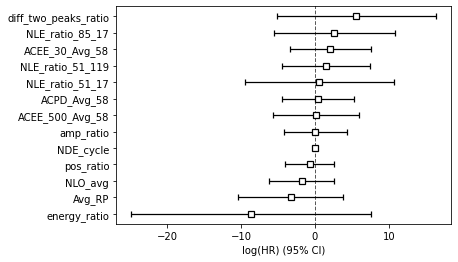

In [9]:
cph.plot()

# predicting survival function for df

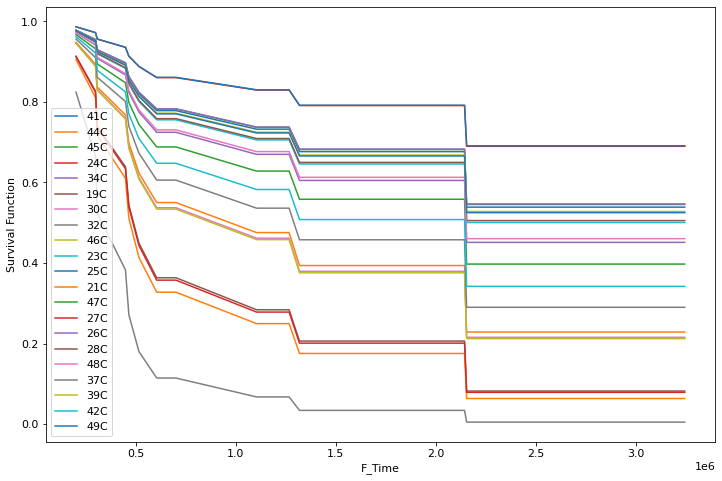

In [10]:
fig= plt.figure(figsize=(12,8))

surv_function=cph.predict_survival_function(df_scale)
ID=df_scale.index
plt.rc('font', size=11) 
plt.xlabel("F_Time")
plt.ylabel("Survival Function")
plt.plot(surv_function)
plt.legend(ID) 
plt.show()


In [11]:
cph.predict_survival_function(df_scale)

,41C,44C,45C,24C,34C,19C,30C,32C,46C,23C,...,21C,47C,27C,26C,28C,48C,37C,39C,42C,49C
200007.0,0.977960,0.948200,0.978392,0.986716,0.978475,0.913817,0.946197,0.824392,0.945658,0.975372,...,0.905405,0.967291,0.912485,0.971739,0.975710,0.972445,0.956381,0.977251,0.962081,0.977059
297627.0,0.954057,0.893822,0.954947,0.972173,0.955118,0.826799,0.889841,0.665294,0.888773,0.948737,...,0.810818,0.932225,0.824258,0.941295,0.949431,0.942739,0.910174,0.952597,0.921659,0.952203
306142.0,0.928135,0.836948,0.929508,0.956235,0.929772,0.739641,0.831046,0.524026,0.829464,0.919941,...,0.717100,0.894683,0.736040,0.908525,0.921008,0.910736,0.861358,0.925883,0.878657,0.925276
447380.0,0.895152,0.767705,0.897120,0.935698,0.897498,0.638961,0.759678,0.382994,0.757531,0.883441,...,0.610255,0.847658,0.634345,0.867208,0.884963,0.870344,0.801193,0.891929,0.825206,0.891060
464392.0,0.860231,0.698150,0.862803,0.913620,0.863297,0.543986,0.688246,0.271298,0.685603,0.844969,...,0.511038,0.798791,0.538652,0.823935,0.846949,0.827987,0.739866,0.856024,0.770169,0.854890
514878.0,0.820387,0.623437,0.823614,0.887987,0.824234,0.449053,0.611833,0.179880,0.608746,0.801301,...,0.413634,0.744217,0.443272,0.775174,0.803771,0.780192,0.672879,0.815115,0.709350,0.813696
603724.0,0.778508,0.550152,0.782382,0.860502,0.783128,0.363308,0.537234,0.114237,0.533808,0.755674,...,0.327454,0.688246,0.357403,0.724649,0.758620,0.730586,0.605896,0.772187,0.647723,0.770486
700000.0,0.778508,0.550152,0.782382,0.860502,0.783128,0.363308,0.537234,0.114237,0.533808,0.755674,...,0.327454,0.688246,0.357403,0.724649,0.758620,0.730586,0.605896,0.772187,0.647723,0.770486
1103303.0,0.732386,0.475533,0.736922,0.829538,0.737796,0.283803,0.461684,0.067295,0.458024,0.705760,...,0.249393,0.628298,0.278076,0.669900,0.709185,0.676734,0.536192,0.724996,0.582617,0.723010
1266052.0,0.732386,0.475533,0.736922,0.829538,0.737796,0.283803,0.461684,0.067295,0.458024,0.705760,...,0.249393,0.628298,0.278076,0.669900,0.709185,0.676734,0.536192,0.724996,0.582617,0.723010


In [12]:
f_df_scale=df_scale[~df_scale.Observed]
t_df_scale=df_scale[df_scale.Observed]

In [13]:
#Failed
cph.predict_survival_function(t_df_scale)

,41C,44C,19C,30C,32C,46C,21C,27C,37C,42C
200007.0,0.977960,0.948200,0.913817,0.946197,0.824392,0.945658,0.905405,0.912485,0.956381,0.962081
297627.0,0.954057,0.893822,0.826799,0.889841,0.665294,0.888773,0.810818,0.824258,0.910174,0.921659
306142.0,0.928135,0.836948,0.739641,0.831046,0.524026,0.829464,0.717100,0.736040,0.861358,0.878657
447380.0,0.895152,0.767705,0.638961,0.759678,0.382994,0.757531,0.610255,0.634345,0.801193,0.825206
464392.0,0.860231,0.698150,0.543986,0.688246,0.271298,0.685603,0.511038,0.538652,0.739866,0.770169
514878.0,0.820387,0.623437,0.449053,0.611833,0.179880,0.608746,0.413634,0.443272,0.672879,0.709350
603724.0,0.778508,0.550152,0.363308,0.537234,0.114237,0.533808,0.327454,0.357403,0.605896,0.647723
700000.0,0.778508,0.550152,0.363308,0.537234,0.114237,0.533808,0.327454,0.357403,0.605896,0.647723
1103303.0,0.732386,0.475533,0.283803,0.461684,0.067295,0.458024,0.249393,0.278076,0.536192,0.582617
1266052.0,0.732386,0.475533,0.283803,0.461684,0.067295,0.458024,0.249393,0.278076,0.536192,0.582617


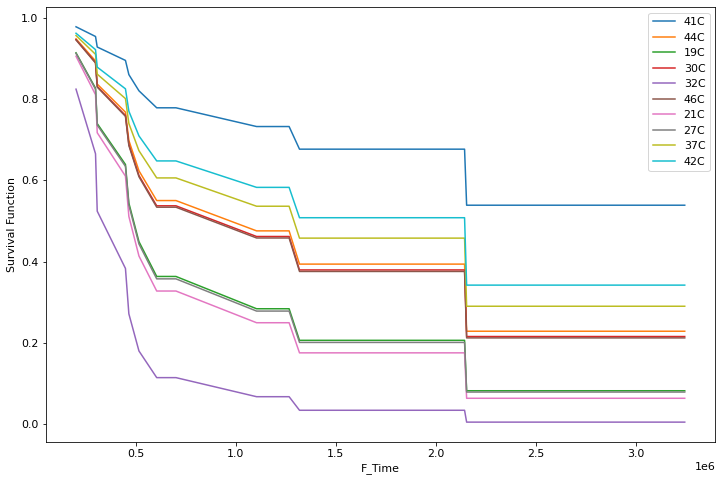

In [14]:
fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(t_df_scale)
ID=t_df_scale.index
plt.rc('font', size=11) 
plt.plot(ax)
plt.xlabel("F_Time")
plt.ylabel("Survival Function")
plt.legend(ID) 
plt.show()


In [15]:
#Not failed
cph.predict_survival_function(f_df_scale)

,45C,24C,34C,23C,25C,47C,26C,28C,48C,39C,49C
200007.0,0.978392,0.986716,0.978475,0.975372,0.986779,0.967291,0.971739,0.975710,0.972445,0.977251,0.977059
297627.0,0.954947,0.972173,0.955118,0.948737,0.972305,0.932225,0.941295,0.949431,0.942739,0.952597,0.952203
306142.0,0.929508,0.956235,0.929772,0.919941,0.956441,0.894683,0.908525,0.921008,0.910736,0.925883,0.925276
447380.0,0.897120,0.935698,0.897498,0.883441,0.935996,0.847658,0.867208,0.884963,0.870344,0.891929,0.891060
464392.0,0.862803,0.913620,0.863297,0.844969,0.914016,0.798791,0.823935,0.846949,0.827987,0.856024,0.854890
514878.0,0.823614,0.887987,0.824234,0.801301,0.888493,0.744217,0.775174,0.803771,0.780192,0.815115,0.813696
603724.0,0.782382,0.860502,0.783128,0.755674,0.861123,0.688246,0.724649,0.758620,0.730586,0.772187,0.770486
700000.0,0.782382,0.860502,0.783128,0.755674,0.861123,0.688246,0.724649,0.758620,0.730586,0.772187,0.770486
1103303.0,0.736922,0.829538,0.737796,0.705760,0.830283,0.628298,0.669900,0.709185,0.676734,0.724996,0.723010
1266052.0,0.736922,0.829538,0.737796,0.705760,0.830283,0.628298,0.669900,0.709185,0.676734,0.724996,0.723010


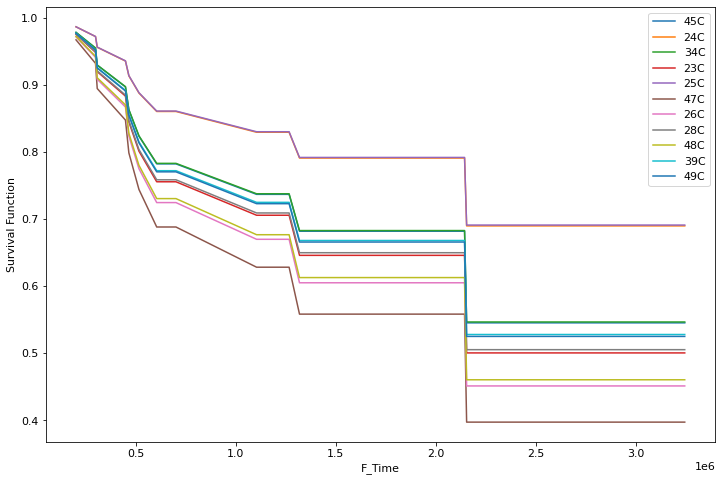

In [16]:

fig= plt.figure(figsize=(12,8))

ax=cph.predict_survival_function(f_df_scale)
ID=f_df_scale.index
plt.rc('font', size=11) 
plt.plot(ax)
plt.xlabel("F_Time")
plt.ylabel("Survival Function")
plt.legend(ID) 
plt.show()
